In [23]:
import mat73
import scipy
from scipy import io
import glob
import numpy as np
import h5py
# import mat73
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import os
import pandas as pd
import cv2
from scipy.ndimage import gaussian_filter
import matplotlib.ticker
from sklearn.metrics import mean_absolute_error
import math

In [24]:

folder_path_48_led = 'D:\\ML_sheet\\strain_led_on\\raw_data_dic\\CTS\\48hr_sheet\\'
folder_path_48_uv_on = 'D:\\ML_sheet\\strain_led_on\\raw_data_dic\\CTS\\48hr_sheet\\'
# folder_path_96 = 'D:\\ML_sheet\\strain_led_on\\raw_data_dic\\raw_experiment_data_96\\'
# folder_path_std = 'D:\\ML_sheet\\strain_led_on\\raw_data_dic\\Std_DIC\\'

results_path = r'D:\ML_sheet\strain_led_on\raw_data_dic\CTS\results/'

In [25]:
def full_path(folder_path, data_type='eyy', magnification='30x_48'):

    full_path = sorted(glob.glob(folder_path+ 'strain'+ '\\' +  data_type + '\\'+ str(magnification)+'\\*mat'),key=os.path.getmtime)

    return full_path




In [26]:
sigma =3

def load_mat(path,data_type):## loading
    data_mat = io.loadmat(path)[data_type]
    data_mat= np.flip(data_mat, axis=1)
    # x, y = np.nonzero(data_mat)
    # xl, xr = x.min(),x.max()
    # yl, yr = y.min(),y.max()
    # data_mat = data_mat[xl:xr+1, yl:yr+1]
    width = np.shape(data_mat)[1]
    height = np.shape(data_mat)[0]
    # data_mat = data_mat[30:height-50,2:width-2]
    # data_mat = gaussian_filter(data_mat,sigma)
    # mean_strain = np.mean(np.absolute(np.array(data_mat)))
    # width = np.shape(data_mat)[1]
    # height = np.shape(data_mat)[0]
    mean2 = np.mean(data_mat)

    return data_mat, mean2



In [27]:
frame=0

ox,oy = int((2330)/5), int(1400/5)


In [28]:
## angles##
th = np.arange(110,-120,-10)
th_rad = np.deg2rad(th)
x_near, x_far= 70, 120
radius = np.arange(x_near,x_far, 10)

index_cor = []
th_rad_each_point = []
for i in range(len(radius)):

    for j in range(len(th_rad)):
        y = int(radius[i]*np.sin(th_rad[j]))
        x = int(radius[i]*np.cos(th_rad[j]))
        th_rad_list = th_rad[j]
        th_rad_each_point.append(th_rad_list)
        xy = [x,y]
        index_cor.append(xy)

## find y coordinates based on x and theta (th)
index_cor_crack_tip_origin = np.array(index_cor)
th_rad_each_point =np.array(th_rad_each_point)

## transform the origin from crack tip centre to original orig
X_original = ox+(index_cor_crack_tip_origin [:,0])
Y_original = oy-(index_cor_crack_tip_origin [:,1])

# print(X_original[40])
# print(Y_original[40])





In [29]:
def plot_contour_strain_points(folder_path, data_type='eyy', magnification='30x_48'):

    figure_name = full_path(folder_path, data_type, magnification)[frame]
    read_data = load_mat(figure_name,data_type)[0]
    # read_data = read_data[oy-200:oy+100, ox-100:ox+100]
    # read_data = gaussian_filter(read_data,sigma)
    # read_data =  cv2.resize(read_data,(w_size,int(h_size)))
    fig,ax = plt.subplots(figsize=(2000/100,1400/100),nrows=1,ncols=1)
    shw = ax.contourf(read_data, 30, cmap='jet')
    # ax.clabel(shw, inline=True, fontsize=10)
    ax.plot(ox,oy,'o',markersize=5, color='k')
    # ax.plot(1180,594,'*',markersize=20,color='w')
    ax.plot(X_original, Y_original,'o',markersize=5, color='b')
    # ax.plot(rc[:,1], rc[:,0],'o',markersize=2,color='r')
    plt.axis('on')
    ax.invert_yaxis()
    ax.axis('on')
    ax.set_aspect(aspect=1)

    # fmt = matplotlib.ticker.ScalarFormatter(useMathText=True)
    # fmt.set_powerlimits((0, 0))
    bar = plt.colorbar(shw)

    # bar.formatter.set_useMathText(True)
    # bar.ax.tick_params(labelsize=40)
    # bar.ax.yaxis.get_offset_text().set_fontsize(50)
    #
    # bar.ax.locator_params(nbins=5)
        # ax.set_title('{}:{}'.format('frame',frame_item),fontsize=50,loc='lower left')
    #fig.savefig(results_path+str('/')+str(frame)+str(data_type)+str(magnification)+'.jpg',bbox_inches='tight',pad_inches=0)
    fig.show()




def plot_contour_dis_points(folder_path, data_type='eyy', magnification='30x_48'):

    figure_name = full_path(folder_path, data_type, magnification)[frame]
    read_data = load_mat(figure_name,data_type)[0]
    # read_data =  cv2.resize(read_data,(w_size,int(h_size)))
    fig,ax = plt.subplots(figsize=(2000/100,1400/100),nrows=1,ncols=1)
    shw = ax.contourf(read_data, 50, cmap='jet')
    # ax.clabel(shw, inline=True, fontsize=10)
    ax.plot(ox,oy,'o',markersize=5, color='k')
    ax.plot(X_original, Y_original,'o',markersize=5, color='b')
    # ax.plot(rc[:,1], rc[:,0],'o',markersize=2,color='r')


    plt.axis('on')
    ax.invert_yaxis()
    ax.axis('on')
    ax.set_aspect(aspect=1)

    # fmt = matplotlib.ticker.ScalarFormatter(useMathText=True)
    # fmt.set_powerlimits((0, 0))
    bar = plt.colorbar(shw)

    # bar.formatter.set_useMathText(True)
    # bar.ax.tick_params(labelsize=40)
    # bar.ax.yaxis.get_offset_text().set_fontsize(50)
    #
    # bar.ax.locator_params(nbins=5)
        # ax.set_title('{}:{}'.format('frame',frame_item),fontsize=50,loc='lower left')
    #fig.savefig(results_path+str('/')+str(frame)+str(data_type)+str(magnification)+'.jpg',bbox_inches='tight',pad_inches=0)
    fig.show()

In [30]:
# plot_contour_strain_points(folder_path_48_led , data_type='eyy', magnification='spary_corrected')
# # plot_contour_strain(folder_path_48_uv_on, data_type='eyy', magnification='uv_on_48_1x_still')
# # plot_contour_strain(folder_path_96, data_type='eyy', magnification='30x_96')
# # plot_contour_strain(folder_path_std, data_type='eyy', magnification='standard')
#
# plot_contour_strain_points(folder_path_48_led , data_type='exx', magnification='spary_corrected')
# # plot_contour_strain(folder_path_48_uv_on, data_type='exx', magnification='uv_on_48_1x_still')
# # plot_contour_strain(folder_path_96, data_type='exx', magnification='30x_96')
# # plot_contour_strain(folder_path_std, data_type='exx', magnification='standard')
#
# plot_contour_strain_points(folder_path_48_led , data_type='exy', magnification='spary_corrected')
# # plot_contour_strain(folder_path_48_uv_on, data_type='exy', magnification='uv_on_48_1x_still')
# # plot_contour_strain(folder_path_96, data_type='exy', magnification='30x_96')
# # plot_contour_strain(folder_path_std, data_type='exy', magnification='standard')

In [31]:
# plot_contour_dis_points(folder_path_48_led , data_type='u', magnification='spary_corrected')
# plot_contour_dis(folder_path_48_uv_on, data_type='u', magnification='uv_on_48_1x_still')
# # plot_contour_dis(folder_path_96, data_type='u', magnification='30x_96')
# # plot_contour_dis(folder_path_std, data_type='u', magnification='standard')

c:\users\mechano\anaconda3\envs\start_ml\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


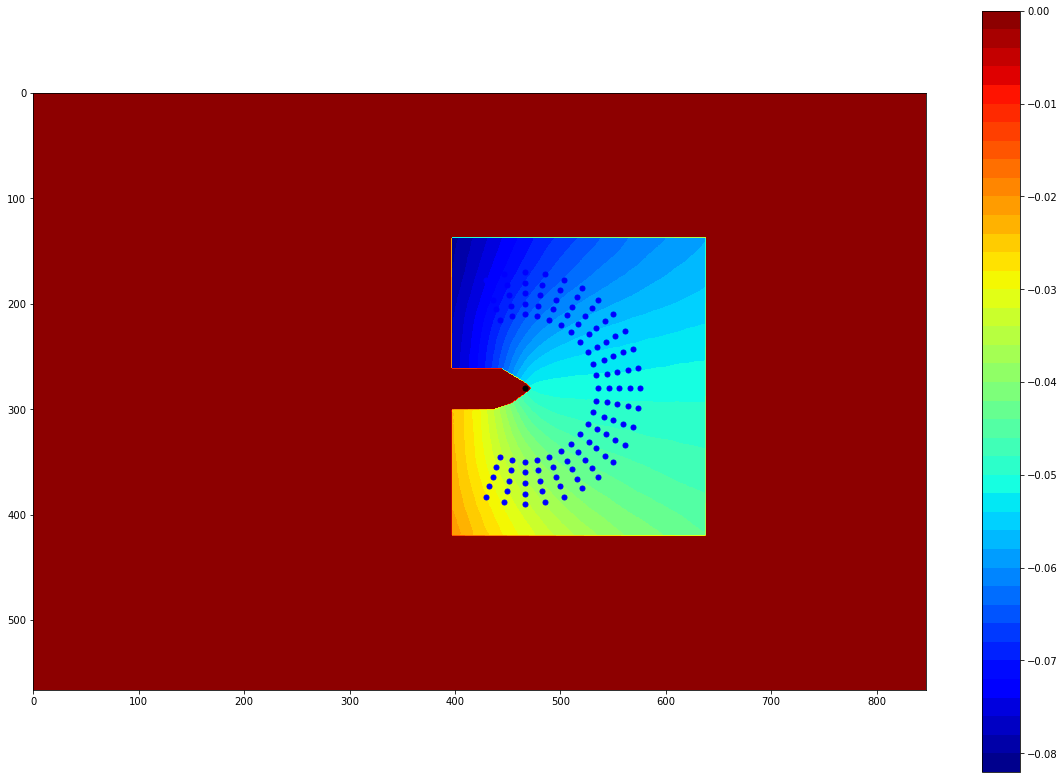

In [32]:
plot_contour_dis_points(folder_path_48_led , data_type='v', magnification='spary_corrected')
# plot_contour_dis(folder_path_48_uv_on, data_type='v', magnification='uv_on_48_1x_still')
# # plot_contour_dis(folder_path_96, data_type='v', magnification='30x_96')
# # plot_contour_dis(folder_path_std, data_type='v', magnification='standard')

In [33]:
frame_list = len(full_path(folder_path_48_led , data_type='eyy', magnification='spary_corrected'))

KI = []
KII = []
eyy_mean =[]

for frame in range(frame_list):


    load_mat_eyy= load_mat(full_path(folder_path_48_led , data_type='eyy', magnification='spary_corrected')[frame],data_type='eyy')[0]
    load_mat_exx= load_mat(full_path(folder_path_48_led , data_type='exx', magnification='spary_corrected')[frame],data_type='exx')[0]
    load_mat_exy= load_mat(full_path(folder_path_48_led , data_type='exy', magnification='spary_corrected')[frame],data_type='exy')[0]
    load_mat_u= load_mat(full_path(folder_path_48_led , data_type='u', magnification='spary_corrected')[frame],data_type='u')[0]
    load_mat_v= load_mat(full_path(folder_path_48_led , data_type='v', magnification='spary_corrected')[frame],data_type='v')[0]
    # print('value')
    # print(XXX[744,1206])
    #
    # print(np.where(XXX==-2.9889573370093476))
    extract_eyy = (load_mat_eyy[Y_original[:],X_original[:]])
    extract_exx = (load_mat_exx[Y_original[:],X_original[:]])
    extract_exy = (load_mat_exy[Y_original[:],X_original[:]])
    extract_u = (load_mat_u[Y_original[:],X_original[:]])
    extract_v = (load_mat_v[Y_original[:],X_original[:]])



    n=1

    pix_mm=2/30
    x_cor = X_original
    y_cor = Y_original
    crack_tip_x=ox
    crack_tip_y=oy
    x_cor_crack_tip = x_cor-crack_tip_x
    y_cor_crack_tip = y_cor-crack_tip_y
    #pixel to mm to m
    x_cor_crack_tip = x_cor_crack_tip * pix_mm * 10**(-3)
    y_cor_crack_tip = y_cor_crack_tip * pix_mm * 10**(-3)


    u_dis = extract_u  * 10**(-3)

    v_dis = extract_v * 10**(-3)
    Th_rad = th_rad_each_point

    r = (x_cor_crack_tip**2 + y_cor_crack_tip**2)**(1/2)

    v=0.33
    E =3300*10**6 ## N/m2
    meu = E/(2*(1+v))
    X = (3-4*v) #(3-v)/(1+v)
    ## calculate radius

    ## get r and theta function for given series expansion
    fI=[]
    fII = []
    gI = []
    gII = []

    for i in range(n):
        for k in range(len(r)):
            fI_rt = 1/(2*meu)*r[k]**((i+1)/2)*((X+(i+1)/2+(-1)**n*math.cos((i+1)/2*Th_rad[k])-(i+1)/2*math.cos(((i+1)/2-2)*Th_rad[k])))
            fII_rt = 1/(2*meu)*r[k]**((i+1)/2)*((X+(i+1)/2-(-1)**n*math.sin((i+1)/2*Th_rad[k])-(i+1)/2*math.sin(((i+1)/2-2)*Th_rad[k])))
            gI_rt = 1/(2*meu)*r[k]**((i+1)/2)*((X-(i+1)/2-(-1)**n*math.sin((i+1)/2*Th_rad[k])+(i+1)/2*math.sin(((i+1)/2-2)*Th_rad[k])))
            gII_rt = 1/(2*meu)*r[k]**((i+1)/2)*((-X+(i+1)/2-(-1)**n*math.cos((i+1)/2*Th_rad[k])-(i+1)/2*math.cos(((i+1)/2-2)*Th_rad[k])))
            fI.append(fI_rt)
            fII.append(fII_rt)
            gI.append(gI_rt)
            gII.append(gII_rt)


 ####list to numpy array
    fI_array = np.array(fI)

    fII_array = np.array(fII)
    gI_array = np.array(gI)
    gII_array = np.array(gII)
    ## reshape to number of series i.e n
    fI_reshape = fI_array.reshape((-1,n))
    fII_reshape = -fII_array.reshape((-1,n))
    # print(fI_reshape.shape, fII_reshape.shape)
    gI_reshape = gI_array.reshape((-1,n))
    gII_reshape = -gII_array.reshape((-1,n))
    f_hstack = np.hstack((fI_reshape,fII_reshape))
    g_hstack = np.hstack((gI_reshape,gII_reshape))
    f_g_vstack =  np.vstack((f_hstack,g_hstack))

    one_column = np.ones(len(r))
    zero_column = np.zeros(len(r))
    one_zero_h_stack = np.hstack((one_column,zero_column))
    one_zero_h_stack = np.expand_dims( one_zero_h_stack,axis=1)
    zero_one_h_stack = np.hstack((zero_column,one_column))
    zero_one_h_stack = np.expand_dims( zero_one_h_stack,axis=1)

    # print(one_zero_h_stack)
    # print(f_g_vstack)
    fg_o_z_hstack = np.hstack((f_g_vstack,one_zero_h_stack))
    fg_o_z_z_o_hstack = np.hstack((fg_o_z_hstack,zero_one_h_stack))
    # print(fg_o_z_hstack)
    y_x_v_stack = np.hstack((-y_cor_crack_tip,x_cor_crack_tip))

    y_x_v_stack = np.expand_dims( y_x_v_stack,axis=1)

    b = np.hstack((fg_o_z_z_o_hstack ,y_x_v_stack))


    h = np.hstack((u_dis,v_dis))
    results = np.linalg.inv(np.transpose(b) @ b) @ np.transpose(b) @ h
    pi = math.pi
    k1 = results[0] * (2*pi)**(1/2) / 10**(6)  ## Mpam1/2
    k2 = results[n] * (2*pi)**(1/2) / 10**(6)## Mpam1/2
    Tx = results[-3] * 10**3
    Ty = results[-2]* 10**3
    R = results[-1]
    KI.append(k1)
    KII.append(k2)
    eyy_mean.append((np.mean(extract_eyy))*100.)


result_df = pd.DataFrame({'KI':KI,'KII':KII,'mean_eyy':eyy_mean})
#result_df.to_excel(results_path+'spary_corrected.xlsx')
print(result_df)


print('#################Results##############################################################')

         KI       KII  mean_eyy
0 -1.059198 -0.000005  0.142512
#################Results##############################################################
